# Informações

Esse notebook serve como resposta para as simulações das figuras do livro do Gonzalez. Basta executar que será possível analisar tanto o código em questão quanto as figuras geradas

## Figuras e Códigos

Imports

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from PIL import Image
import math

# 3.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


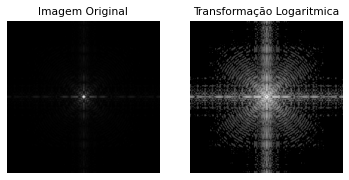

In [91]:
A = cv2.imread("Fig3.05(a).jpg")
A = np.mean(A, -1)

image = cv2.imread('Fig3.05(a).jpg')
   
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
log_image = np.array(log_image, dtype = np.uint8)

fig, axs = plt.subplots(1, 2)

axs[0].imshow(A, cmap='gray')
axs[0].set_title('Imagem Original')
axs[0].axis('off')

axs[1].imshow(log_image, cmap='gray')
axs[1].set_title('Transformação Logaritmica')
axs[1].axis('off')

plt.show()

fig.savefig("imagensProduzidas/Fig3.5.jpg")

# 3.8

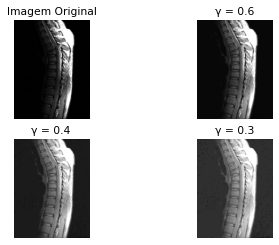

In [92]:
A = cv2.imread('Fig3.08(a).jpg', 0)
A = A.astype(np.int32)
B = 255*A
C = 255*A
D = 255*A

for i in range(len(B)):
    for j in range(len(B[0])):
        B[i][j] = (B[i][j])**0.6

for i in range(len(C)):
    for j in range(len(C[0])):
        C[i][j] = (C[i][j])**0.4

for i in range(len(D)):
    for j in range(len(D[0])):
        D[i][j] = (D[i][j])**0.3


fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].set_title('Imagem Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(B, cmap='gray')
axs[0, 1].set_title('γ = 0.6')
axs[0, 1].axis('off')

axs[1, 0].imshow(C, cmap='gray')
axs[1, 0].set_title('γ = 0.4 ')
axs[1, 0].axis('off')

axs[1, 1].imshow(D, cmap='gray')
axs[1, 1].set_title('γ = 0.3')
axs[1, 1].axis('off')

plt.show()

fig.savefig('imagensProduzidas/Fig3.8.jpg')

# 3.10

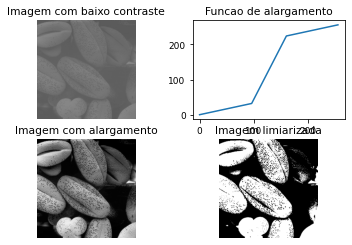

In [93]:
def sub_lg(pixel):
    if pixel <= 96:
        y = pixel/3
    elif 96 < pixel < 160:
        y = 3*pixel - 256
    else:
        y = (pixel+512)/3
    return y

x = np.arange(0, 256)
A = x.astype(float)
B = cv2.imread('Fig3.10(b).jpg')
C = np.mean(B, -1)
D = np.mean(B, -1)

for i in range(len(A)):
    A[i] = sub_lg(x[i])

for i in range(len(C)):
    for j in range(len(C[0])):
        C[i][j] = sub_lg(C[i][j])

for i in range(len(D)):
    for j in range(len(D[0])):
        if D[i][j] <= 110:
            D[i][j] = 0
        else:
            D[i][j] = 255

fig, axs = plt.subplots(2, 2)

axs[0, 1].plot(x, A)
axs[0, 1].set_title('Funcao de alargamento')

axs[0, 0].imshow(B, cmap='gray')
axs[0, 0].set_title('Imagem com baixo contraste')
axs[0, 0].axis('off')

axs[1, 0].imshow(C, cmap='gray')
axs[1, 0].set_title('Imagem com alargamento')
axs[1, 0].axis('off')

axs[1, 1].imshow(D, cmap='gray')
axs[1, 1].set_title('Imagem limiarizada')
axs[1, 1].axis('off')

plt.show()

fig.savefig('imagensProduzidas/Fig3.10.jpg')

# 3.12

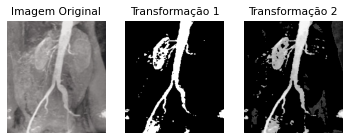

In [94]:
A = cv2.imread('Fig3.12.jpg')
B = np.mean(A, -1)
C = np.mean(A, -1)

for i in range(len(B)):
    for j in range(len(B[0])):
        if 165 < B[i][j] < 256:
            B[i][j] = 230
        else:
            B[i][j] = 30

for i in range(len(C)):
    for j in range(len(C[0])):
        if 80 < C[i][j] < 160:
            C[i][j] = 20

fig, axs = plt.subplots(1, 3)

axs[0].imshow(A, cmap='gray')
axs[0].set_title('Imagem Original')
axs[0].axis('off')

axs[1].imshow(B, cmap='gray')
axs[1].set_title('Transformação 1')
axs[1].axis('off')

axs[2].imshow(C, cmap='gray')
axs[2].set_title('Transformação 2')
axs[2].axis('off')

plt.show()

fig.savefig('imagensProduzidas/Fig3.12.jpg')

# 3.14

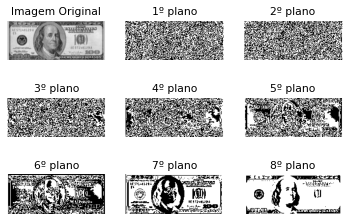

In [95]:
A = cv2.imread('Fig3.14.jpg', 0)
Pbits = []

for i in range(8):
    Pbits.append(np.zeros((len(A), len(A[0])), dtype=np.uint8))

for i in range(len(A)):
    for j in range(len(A[0])):
        pixel = np.binary_repr(A[i][j], width=8)
        pixel = pixel
        for k in range(8):
            mat = Pbits[7-k]
            if int(pixel[k]) == 1:
                mat[i][j] = 2**(7-k)
            else:
                mat[i][j] = 0
            Pbits[7-k] = mat


fig, axs = plt.subplots(3, 3)

axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].set_title('Imagem Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(Pbits[0], cmap='gray')
axs[0, 1].set_title('1º plano')
axs[0, 1].axis('off')

axs[0, 2].imshow(Pbits[1], cmap='gray')
axs[0, 2].set_title('2º plano')
axs[0, 2].axis('off')

axs[1, 0].imshow(Pbits[2], cmap='gray')
axs[1, 0].set_title('3º plano')
axs[1, 0].axis('off')

axs[1, 1].imshow(Pbits[3], cmap='gray')
axs[1, 1].set_title('4º plano')
axs[1, 1].axis('off')

axs[1, 2].imshow(Pbits[4], cmap='gray')
axs[1, 2].set_title('5º plano')
axs[1, 2].axis('off')

axs[2, 0].imshow(Pbits[5], cmap='gray')
axs[2, 0].set_title('6º plano')
axs[2, 0].axis('off')

axs[2, 1].imshow(Pbits[6], cmap='gray')
axs[2, 1].set_title('7º plano')
axs[2, 1].axis('off')

axs[2, 2].imshow(Pbits[7], cmap='gray')
axs[2, 2].set_title('8º plano')
axs[2, 2].axis('off')
plt.show()

fig.savefig('imagensProduzidas/Fig3.14.jpg')

# 3.20

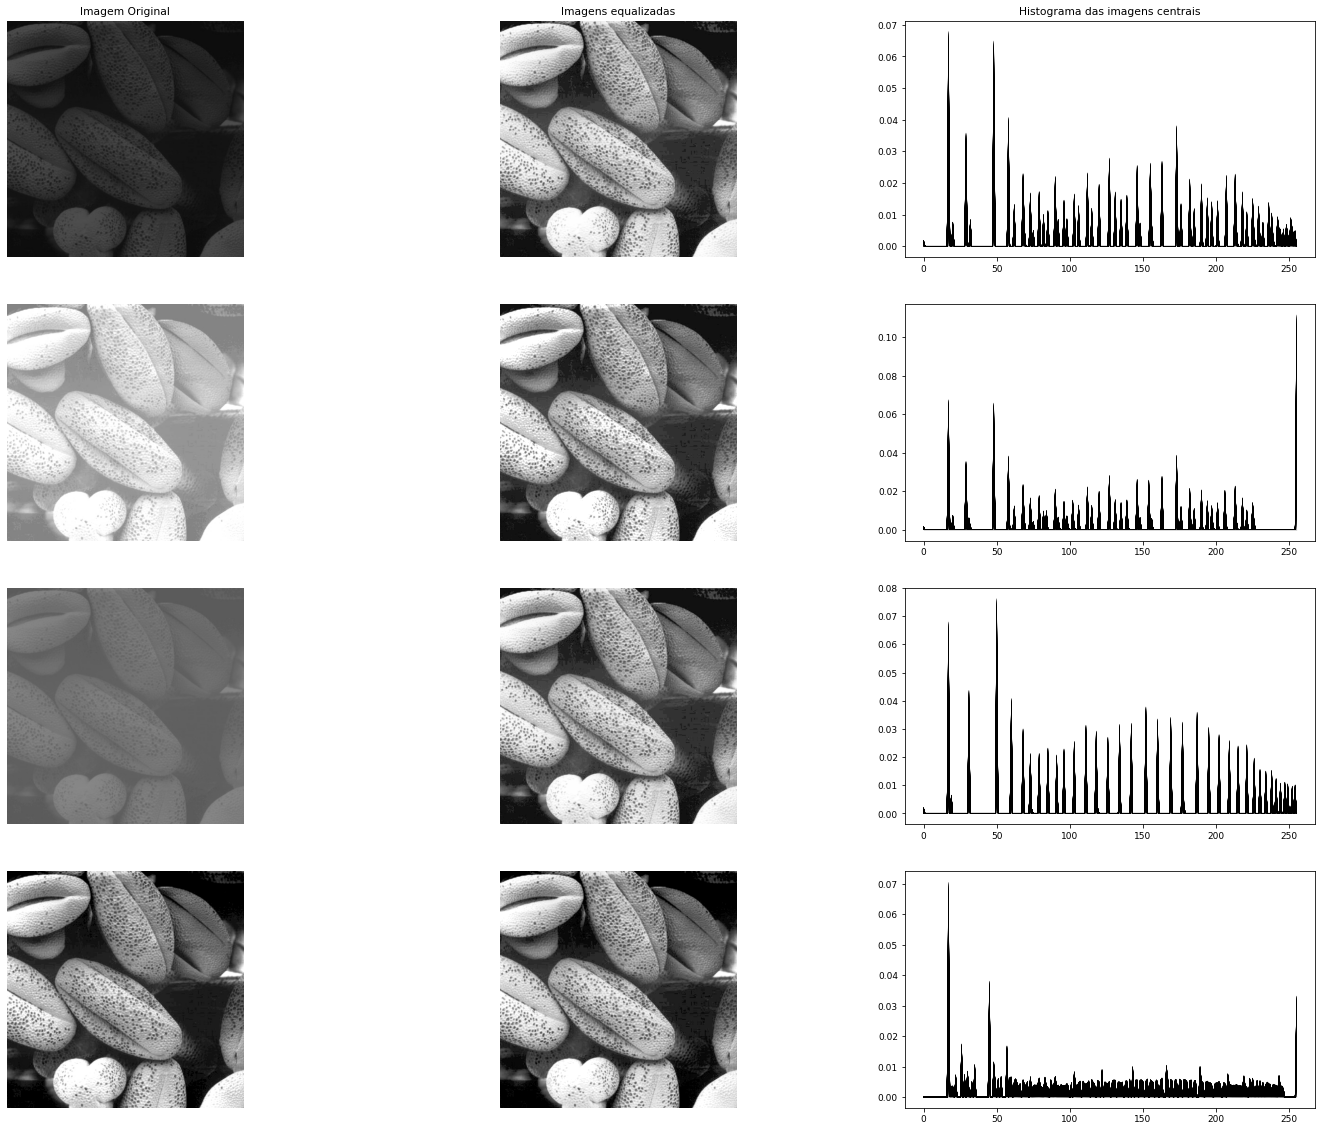

In [96]:
def histogram(img, L=256):

    #guardar a soma da qtdd dos pixels em um vetor
    pixels = np.zeros(L, dtype=float)
    pixels[0] = (img == 0).sum()
    for i in range(1, L):
        pixels[i] = (img == i).sum() + pixels[i-1]
    #equcao do mapeamento
    pixels = ((L - 1) * pixels) // (len(img) * len(img[0]))

    #refazer a imagem alterando os valores dos pixels
    for i in range(len(img)):
        for j in range(len(img[0])):
            pos = int(img[i][j])
            img[i][j] = pixels[pos]

    probabs = np.zeros(len(pixels), dtype=float)
    values = []
    for i in range(L):
        probabs[i] = (img == i).sum() / (len(img) * len(img[0]))
        values.append(np.linspace(0, probabs[i], 256))

    return img, values

A = cv2.imread('Fig3.15(a)1top.jpg')

B = cv2.imread('Fig3.15(a)2.jpg')

C = cv2.imread('Fig3.15(a)3.jpg')

D = cv2.imread('Fig3.15(a)4.jpg')


fig, axs = plt.subplots(4, 3)
fig.set_size_inches(25, 20)


axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].set_title('Imagem Original')
axs[0, 0].axis('off')

A = np.mean(A, -1)
axs[0, 1].imshow(histogram(A)[0], cmap='gray')
axs[0, 1].set_title('Imagens equalizadas')
axs[0, 1].axis('off')

axs[0, 2].plot(np.arange(256), histogram(A)[1], color="black", linewidth=0.3)
axs[0, 2].set_title('Histograma das imagens centrais')


axs[1, 0].imshow(B, cmap='gray')
axs[1, 0].axis('off')

B = np.mean(B, -1)
axs[1, 1].imshow(histogram(B)[0], cmap='gray')
axs[1, 1].axis('off')

axs[1, 2].plot(np.arange(256), histogram(B)[1], color="black", linewidth=0.3)

axs[2, 0].imshow(C, cmap='gray')
axs[2, 0].axis('off')

C = np.mean(C, -1)
axs[2, 1].imshow(histogram(C)[0], cmap='gray')
axs[2, 1].axis('off')

axs[2, 2].plot(np.arange(256), histogram(C)[1], color="black", linewidth=0.3)

axs[3, 0].imshow(D, cmap='gray')
axs[3, 0].axis('off')

D = np.mean(D, -1)
axs[3, 1].imshow(histogram(D)[0], cmap='gray')
axs[3, 1].axis('off')

axs[3, 2].plot(np.arange(256), histogram(D)[1], color='black', linewidth=0.3)

plt.show()

fig.savefig('imagensProduzidas/Fig3.20.jpg')

# 3.25

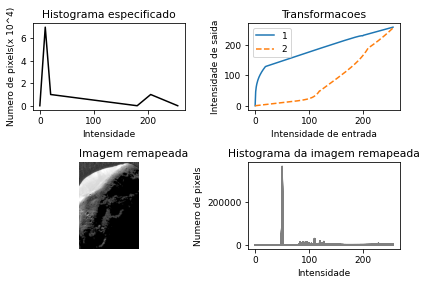

In [97]:
def graph1():
    values = []
    for i in range(10):
        values.append(7/10*i)
    for i in range(10, 20):
        values.append(-0.6*i + 13)
    for i in range(20, 180):
        values.append(-i/160 + 9/8)
    for i in range(180, 205):
        values.append(i/25 - 36/5)
    for i in range(205, 256):
        values.append(-i/50 + 51/10)

    return values


def graphs2():
    values1 = []
    for i in range(20):
        values1.append(np.log(1 + 6.525 * i) / np.log(1.046) + 1.1 * i)
    for i in range(20, 200):
        values1.append(np.log(1 - 0.005 * i) / np.log(2) + 0.6 * i + 117.16)
    for i in range(200, 256):
        values1.append(np.log(1 - 0.003 * i) / np.log(2) + 0.5 * i + 132)

    values2 = []
    for i in range(120):
        values2.append(1.11 ** i / 10000 + 0.2 * i)
    for i in range(120, 210):
        values2.append(1.065 ** i / 20000 + 1.281 * i - 105)
    for i in range(210, 256):
        values2.append(np.exp(0.02*(i-70)) + 0.91 * i - 17.6)

    return values1, values2


def remap(img, remappixel):
    img = img.astype(np.int16)

    for i in range(len(img)):
        for j in range(len(img[0])):
            img[i][j] = int(remappixel[img[i][j]])
            if img[i][j] <= 80:
                img[i][j] += 50


    pixvalues = []
    for i in range(256):
        pixvalues.append(np.linspace(0, (img == i).sum(), 256))

    return img, pixvalues


A = cv2.imread('Fig3.20(a).jpg')
A = np.mean(A, -1)

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(np.arange(0, 256), graph1(), color='black')
axs[0, 0].set_xlabel('Intensidade')
axs[0, 0].set_ylabel('Numero de pixels(x 10^4)')
axs[0, 0].set_title('Histograma especificado')

axs[0, 1].plot(np.arange(0, 256), graphs2()[0], graphs2()[1], '--')
axs[0, 1].set_xlabel('Intensidade de entrada')
axs[0, 1].set_ylabel('Intensidade de saida')
axs[0, 1].legend(['1', '2'])
axs[0, 1].set_title('Transformacoes')


axs[1, 0].imshow(remap(A, graphs2()[0])[0], cmap='gray')
axs[1, 0].set_title('Imagem remapeada', loc='left')
axs[1, 0].axis('off')

axs[1, 1].plot(np.arange(0, 256), remap(A, graphs2()[0])[1], color='gray')
axs[1, 1].set_xlabel('Intensidade')
axs[1, 1].set_ylabel('Numero de pixels')
axs[1, 1].set_title('Histograma da imagem remapeada')
plt.tight_layout()

plt.show()

fig.savefig('imagensProduzidas/Fig3.25.jpg')

# 3.26

/usr/local/lib/python3.7/dist-packages/skimage/util/dtype.py:531: UserWarning: Downcasting int32 to uint8 without scaling because max value 242 fits in uint8
  return _convert(image, np.uint8, force_copy)


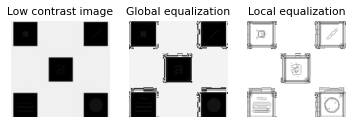

In [98]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank

A = cv2.imread('Fig3.26.jpg', 0)

A = A.astype(np.int32)
img = img_as_ubyte(A)
img_global = exposure.equalize_hist(img)
kernel = np.ones((3,3))
img_local = rank.equalize(img, selem=kernel)

fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)

ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Low contrast image')
ax_img.set_axis_off()

ax_global.imshow(img_global, cmap=plt.cm.gray)
ax_global.set_title('Global equalization')
ax_global.set_axis_off()

ax_local.imshow(img_local, cmap=plt.cm.gray)
ax_local.set_title('Local equalization')
ax_local.set_axis_off()

plt.show()

fig.savefig('imagensProduzidas/Fig3.26.jpg')

# 3.27

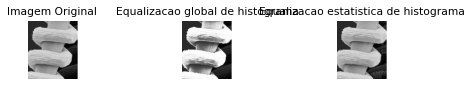

In [99]:
def histogram(A, L=256):
    img = np.copy(A)
    pixels = np.zeros(L, dtype=float)
    pixels[0] = (img == 0).sum()

    for i in range(1, L):
        pixels[i] = (img == i).sum() + pixels[i-1]
    pixels = ((L - 1) * pixels) // (len(img) * len(img[0]))

    for i in range(len(img)):
        for j in range(len(img[0])):
            pos = int(img[i][j])
            img[i][j] = pixels[pos]

    return img

def estathistogram(A):
    img = np.copy(A)
    for i in range(1, len(img)-1):
        for j in range(1, len(A[0])-1):
            medialoc = 0
            variancia = 0
            viz = [
                [ [img[i-1,j-1]], [img[i-1,j]], [img[i-1,j+1]] ],
                [ [img[i,j-1]], [img[i,j]], [img[i,j+1]] ],
                [ [img[i+1,j-1]], [img[i+1,j]], [img[i+1,j+1]] ]
            ]
            viz = np.array(viz)
            for k in range(256):
                medialoc += k * ((viz == k).sum())
            medialoc /= 9

            for k in range(256):
                variancia += ((k-medialoc)**2) * ((viz == k).sum())
            variancia /= 9

            if (medialoc <= 0.4*np.mean(img) and 0.02*np.std(img)<= variancia <= 0.4*np.std(img)):
                img[i][j] *= 4
    return img

A = cv2.imread('Fig3.27.jpg')
A = np.mean(A, -1)

fig, axs = plt.subplots(1, 3)

axs[0].imshow(A, cmap='gray')
axs[0].set_title('Imagem Original')
axs[0].axis('off')

axs[1].imshow(histogram(A), cmap='gray')
axs[1].set_title('Equalizacao global de histograma')
axs[1].axis('off')

axs[2].imshow(estathistogram(A), cmap='gray')
axs[2].set_title('Equalizacao estatistica de histograma')
axs[2].axis('off')

plt.tight_layout()

plt.show()

fig.savefig('imagensProduzidas/Fig3.27.jpg')

# 3.33

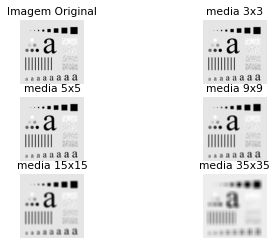

In [100]:
A = cv2.imread('Fig3.35(a).jpg')
A = np.mean(A, -1)

fig, axs = plt.subplots(3, 2)

axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].set_title('Imagem Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.blur(A, (3, 3)), cmap='gray')
axs[0, 1].set_title('media 3x3')
axs[0, 1].axis('off')

axs[1, 0].imshow(cv2.blur(A, (5, 5)), cmap='gray')
axs[1, 0].set_title('media 5x5')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.blur(A, (9, 9)), cmap='gray')
axs[1, 1].set_title('media 9x9')
axs[1, 1].axis('off')

axs[2, 0].imshow(cv2.blur(A, (15, 15)), cmap='gray')
axs[2, 0].set_title('media 15x15')
axs[2, 0].axis('off')

axs[2, 1].imshow(cv2.blur(A, (35, 35)), cmap='gray')
axs[2, 1].set_title('media 35x35')
axs[2, 1].axis('off')

plt.show()

fig.savefig('imagensProduzidas/Fig3.33.jpg')

# 3.34

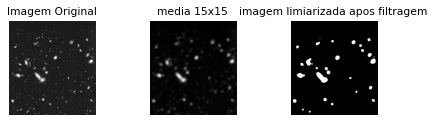

In [101]:
def limiarizer(A, limiar):
    img = np.copy(A)
    for i in range(len(img)):
        for j in range(len(A[0])):
            if img[i][j] <= limiar:
                img[i][j] = 0
            else:
                img[i][j] = 255

    return img

A = cv2.imread('Fig3.36(a).jpg')
A = np.mean(A, -1)

fig, axs = plt.subplots(1, 3)

axs[0].imshow(A, cmap='gray')
axs[0].set_title('Imagem Original')
axs[0].axis('off')

imgmedia = cv2.blur(A, (15, 15))

axs[1].imshow(imgmedia, cmap='gray')
axs[1].set_title('media 15x15')
axs[1].axis('off')

axs[2].imshow(limiarizer(imgmedia, 65), cmap='gray')
axs[2].set_title('imagem limiarizada apos filtragem')
axs[2].axis('off')

plt.tight_layout()

plt.show()

fig.savefig('imagensProduzidas/Fig3.34.jpg')

# 3.35

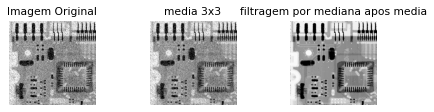

In [102]:
from scipy.signal import medfilt2d

A = cv2.imread('Fig3.37(a).jpg')
A = np.mean(A, -1)

fig, axs = plt.subplots(1, 3)

axs[0].imshow(A, cmap='gray')
axs[0].set_title('Imagem Original')
axs[0].axis('off')

axs[1].imshow(cv2.blur(A, (3, 3)), cmap='gray')
axs[1].set_title('media 3x3')
axs[1].axis('off')

axs[2].imshow(medfilt2d(A, (3, 3)), cmap='gray')
axs[2].set_title('filtragem por mediana apos media')
axs[2].axis('off')

plt.tight_layout()

plt.show()

fig.savefig('imagensProduzidas/Fig3.35.jpg')

# 3.38

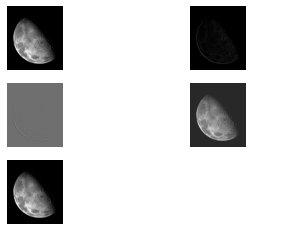

In [110]:
A = cv2.imread('Fig3.40(a).jpg')
A = np.mean(A, -1)

fig, axs = plt.subplots(3, 2)

axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].axis('off')

Lap = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

Laplace = np.copy(A)
cv2.filter2D(A, ddepth=-1, kernel=Lap, dst=Laplace)

Laplace2 = np.copy(Laplace)

for i in range(len(A)):
    for j in range(len(A[0])):
        if Laplace[i][j] < 0:
            Laplace[i][j] = 0

axs[0, 1].imshow(Laplace, cmap='gray')
axs[0, 1].axis('off')

minim = np.min(Laplace2)
maxim = np.max(Laplace2)
Labc = np.copy(Laplace2)

for i in range(len(A)):
    for j in range(len(A[0])):
        Labc[i][j] = 255 * (Labc[i][j]-minim)/(maxim - minim)

axs[1, 0].imshow(Labc, cmap='gray')
axs[1, 0].axis('off')

Lap = [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
Lap = np.array(Lap)

Lapd = np.copy(A)
cv2.filter2D(A, ddepth=-1, kernel=Lap, dst=Lapd)

axs[1, 1].imshow(Lapd, cmap='gray')
axs[1, 1].axis('off')

Lap = [[1, 1, 1], [1, -3, 1], [1, 1, 1]]
Lap = np.array(Lap)
Lape = np.copy(A)
cv2.filter2D(A, ddepth=-1, kernel=Lap, dst=Lape)

axs[2, 0].imshow(Lape, cmap='gray')
axs[2, 0].axis('off')

axs[2, 1].axis('off')
plt.show()

fig.savefig('imagensProduzidas/Fig3.38.jpg')

# 3.40

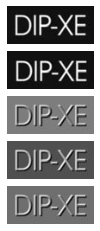

In [109]:
A = cv2.imread('Fig3.40.jpg')
A = np.mean(A, -1)

fig, axs = plt.subplots(5, 1)

axs[0].imshow(A, cmap='gray')
axs[0].axis('off')

Gasb = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])

for i in range(len(Gasb)):
    for j in range(len(Gasb[0])):
        Gasb[i][j] = np.exp(-((i-1)**2 + (j-1)**2)/(2*(3**2)))

Laplace = np.ones((len(A), len(A[0])))

cv2.filter2D(A, ddepth=-1, kernel=Gasb, dst=Laplace)

axs[1].imshow(Laplace, cmap='gray')
axs[1].axis('off')

axs[2].imshow(A-Laplace, cmap='gray')
axs[2].axis('off')

axs[3].imshow(2*A-Laplace, cmap='gray')
axs[3].axis('off')

mask = A - Laplace

axs[4].imshow(A + 4.5*mask, cmap='gray')
axs[4].axis('off')

plt.show()

fig.savefig('imagensProduzidas/Fig3.40.jpg')

# 3.42

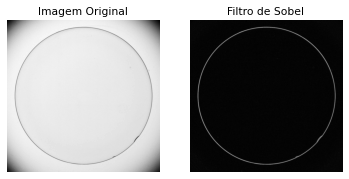

In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

A = cv2.imread('Fig3.45(a).jpg')
A = np.mean(A, -1)

fig, axs = plt.subplots(1, 2)

axs[0].imshow(A, cmap='gray')
axs[0].set_title('Imagem Original')
axs[0].axis('off')

Ax = np.copy(A)
gx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
cv2.filter2D(A, ddepth=-1, kernel=gx, dst=Ax)

Ay = np.copy(A)
gy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
cv2.filter2D(A, ddepth=-1, kernel=gy, dst=Ay)

for i in range(len(A)):
    for j in range(len(A[0])):
        A[i][j] = np.sqrt((Ax[i][j])**2 + (Ay[i][j])**2)

axs[1].imshow(A, cmap='gray')
axs[1].set_title('Filtro de Sobel')
axs[1].axis('off')

plt.show()

fig.savefig('imagensProduzidas/Fig3.42.jpg')

# 3.43

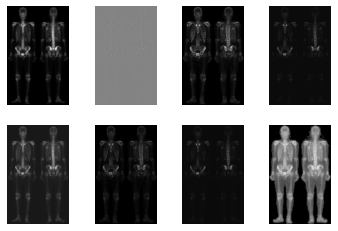

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

A = cv2.imread('Fig3.46(a).jpg')
A = np.mean(A, -1)

fig, axs = plt.subplots(2, 4)

axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].axis('off')

Lap = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

Laplace = np.copy(A)
cv2.filter2D(A, ddepth=-1, kernel=Lap, dst=Laplace)

axs[0, 1].imshow(Laplace, cmap='gray')
axs[0, 1].axis('off')

axs[1, 0].imshow(A+Laplace, cmap='gray')
axs[1, 0].axis('off')

Ax = np.copy(A)
gx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
cv2.filter2D(A, ddepth=-1, kernel=gx, dst=Ax)

Ay = np.copy(A)
gy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
cv2.filter2D(A, ddepth=-1, kernel=gy, dst=Ay)

Sobel = np.copy(A)

for i in range(len(A)):
    for j in range(len(A[0])):
        Sobel[i][j] = abs(Ax[i][j]) + abs(Ay[i][j])

axs[1, 1].imshow(Sobel, cmap='gray')
axs[1, 1].axis('off')

sobmed = cv2.blur(Sobel, (5, 5))

axs[0, 2].imshow(sobmed, cmap='gray')
axs[0, 2].axis('off')

axs[0, 3].imshow((A+Laplace)*sobmed, cmap='gray')
axs[0, 3].axis('off')


axs[1, 2].imshow(A+(A+Laplace)*sobmed, cmap='gray')
axs[1, 2].axis('off')

mat = A+(A+Laplace)*sobmed

for i in range(len(mat)):
    for j in range(len(mat[0])):
        if mat[i][j] < 0:
            mat[i][j] *= -1
        mat[i][j] = mat[i][j] ** 0.15


axs[1, 3].imshow(mat, cmap='gray')
axs[1, 3].axis('off')

plt.show()

fig.savefig('imagensProduzidas/Fig3.43.jpg')